In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

loading the dataset

In [2]:
# Load the dataset
df = pd.read_csv('/Users/shambo/Documents/ML projects/End-to-End ML Pipeline for Predictive Maintenance/data/raw/predictive_maintenance_dataset.csv')
df

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,11/2/2015,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,11/2/2015,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,11/2/2015,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,11/2/2015,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


In [3]:
# Basic data exploration
print("Dataset Overview:")
print(df.head())
print("\nDataset Dimensions:")
print(df.shape)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nData Types:")
print(df.dtypes)


Dataset Overview:
       date    device  failure    metric1  metric2  metric3  metric4  metric5  \
0  1/1/2015  S1F01085        0  215630672       55        0       52        6   
1  1/1/2015  S1F0166B        0   61370680        0        3        0        6   
2  1/1/2015  S1F01E6Y        0  173295968        0        0        0       12   
3  1/1/2015  S1F01JE0        0   79694024        0        0        0        6   
4  1/1/2015  S1F01R2B        0  135970480        0        0        0       15   

   metric6  metric7  metric8  metric9  
0   407438        0        0        7  
1   403174        0        0        0  
2   237394        0        0        0  
3   410186        0        0        0  
4   313173        0        0        3  

Dataset Dimensions:
(124494, 12)

Missing Values:
date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

Data Types:
date       object
devi

In [4]:
# Statistical summary
print("\nDescriptive Statistics:")
print(df.describe())



Descriptive Statistics:
             failure       metric1        metric2        metric3  \
count  124494.000000  1.244940e+05  124494.000000  124494.000000   
mean        0.000851  1.223881e+08     159.492706       9.940897   
std         0.029167  7.045933e+07    2179.677781     185.748131   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%         0.000000  6.128476e+07       0.000000       0.000000   
50%         0.000000  1.227974e+08       0.000000       0.000000   
75%         0.000000  1.833096e+08       0.000000       0.000000   
max         1.000000  2.441405e+08   64968.000000   24929.000000   

             metric4        metric5        metric6        metric7  \
count  124494.000000  124494.000000  124494.000000  124494.000000   
mean        1.741120      14.222669  260172.657726       0.292528   
std        22.908507      15.943028   99151.078547       7.436924   
min         0.000000       1.000000       8.000000       0.000000   
25%         0.000

In [5]:
df["device"]

0         S1F01085
1         S1F0166B
2         S1F01E6Y
3         S1F01JE0
4         S1F01R2B
            ...   
124489    Z1F0MA1S
124490    Z1F0Q8RT
124491    Z1F0QK05
124492    Z1F0QL3N
124493    Z1F0QLC1
Name: device, Length: 124494, dtype: object

In [6]:
#there is a pattern in first 4 characters of device column
df["device_model"]=df["device"].apply(lambda x : x[:4])
df["device_model"].value_counts()

device_model
S1F0    33169
W1F0    23294
S1F1    21689
W1F1    19974
Z1F0    18869
Z1F1     7248
Z1F2      251
Name: count, dtype: int64

In [7]:
df["device_rest"]=df["device"].apply(lambda x : x[4:])
df["device_rest"].value_counts()[:20]

device_rest
QLC1    304
KYCR    304
E9EP    304
EGMT    304
FGBQ    304
FP0C    304
GCED    304
GGPP    304
5X69    304
GPXY    304
H6JG    304
FEH7    304
MA1S    304
FY92    304
FZPA    304
G9T7    304
JH87    304
JXDL    304
JY02    304
GB8A    304
Name: count, dtype: int64

In [8]:
df.drop("device",axis=1,inplace=True)

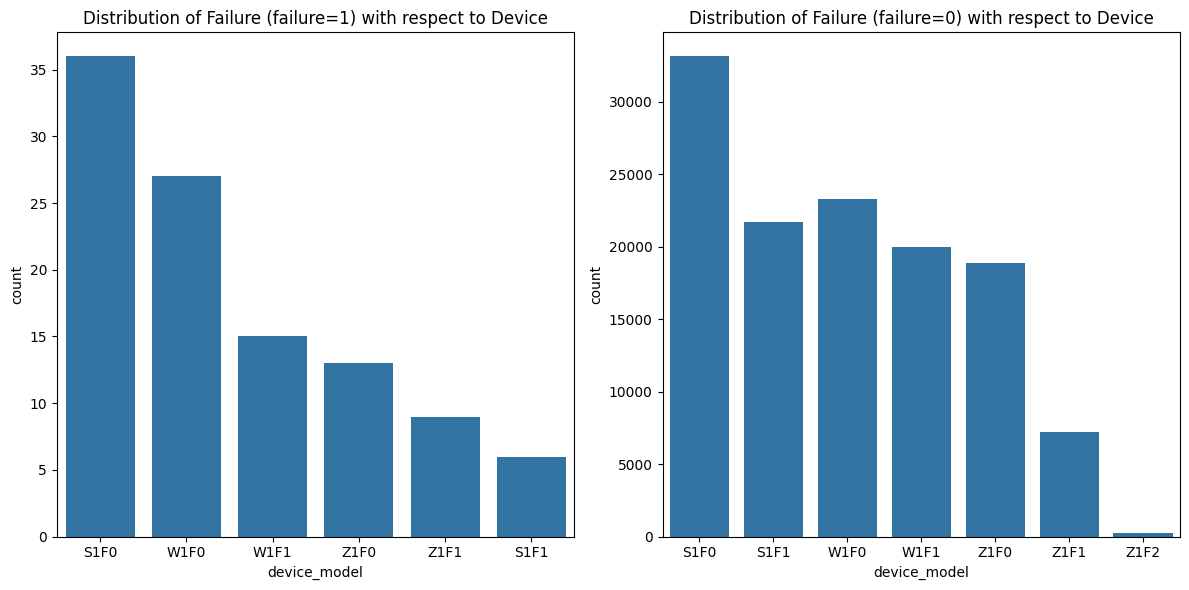

In [9]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 6))
# Plot the distribution of 'failure' with respect to 'device' for failure=1
plt.subplot(1, 2, 1)
sns.countplot(x="device_model", data=df.loc[df["failure"] == 1])
plt.title('Distribution of Failure (failure=1) with respect to Device')

# Plot the distribution of 'failure' with respect to 'device' for failure=0
plt.subplot(1, 2, 2)
sns.countplot(x="device_model", data=df.loc[df["failure"] == 0])
plt.title('Distribution of Failure (failure=0) with respect to Device')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

no Z1F2 in target we could drop it

In [10]:
df.drop(df.loc[df["device_model"]=="Z1F2"].index,axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)
df.tail()

,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,device_model,device_rest
124238,11/2/2015,0,18310224,0,0,0,10,353705,8,8,0,Z1F0,MA1S
124239,11/2/2015,0,172556680,96,107,4,11,332792,0,0,13,Z1F0,Q8RT
124240,11/2/2015,0,19029120,4832,0,0,11,350410,0,0,0,Z1F0,QK05
124241,11/2/2015,0,226953408,0,0,0,12,358980,0,0,0,Z1F0,QL3N
124242,11/2/2015,0,17572840,0,0,0,10,351431,0,0,70000,Z1F0,QLC1


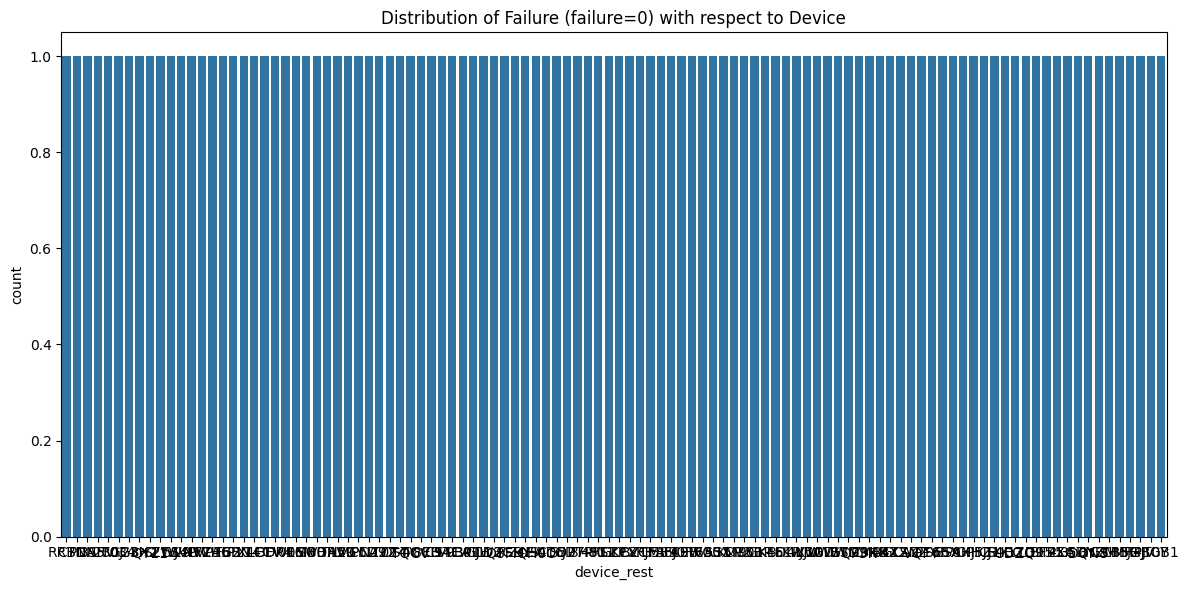

In [11]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 6))
sns.countplot(x="device_rest", data=df.loc[df["failure"] == 1])
plt.title('Distribution of Failure (failure=0) with respect to Device')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [12]:
df.drop("device_rest",axis=1,inplace=True)
df.sample(5)

,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,device_model
60331,3/24/2015,0,147944840,0,2,0,94,241352,0,0,0,Z1F0
2209,1/2/2015,0,225717128,0,0,0,13,286927,0,0,0,Z1F0
86146,5/28/2015,0,118216488,0,0,0,8,269667,0,0,0,S1F0
15803,1/19/2015,0,243608024,0,0,0,12,266803,0,0,0,S1F0
100031,7/7/2015,0,83185816,0,0,0,8,257542,0,0,0,S1F0


Distribution for failure is 0


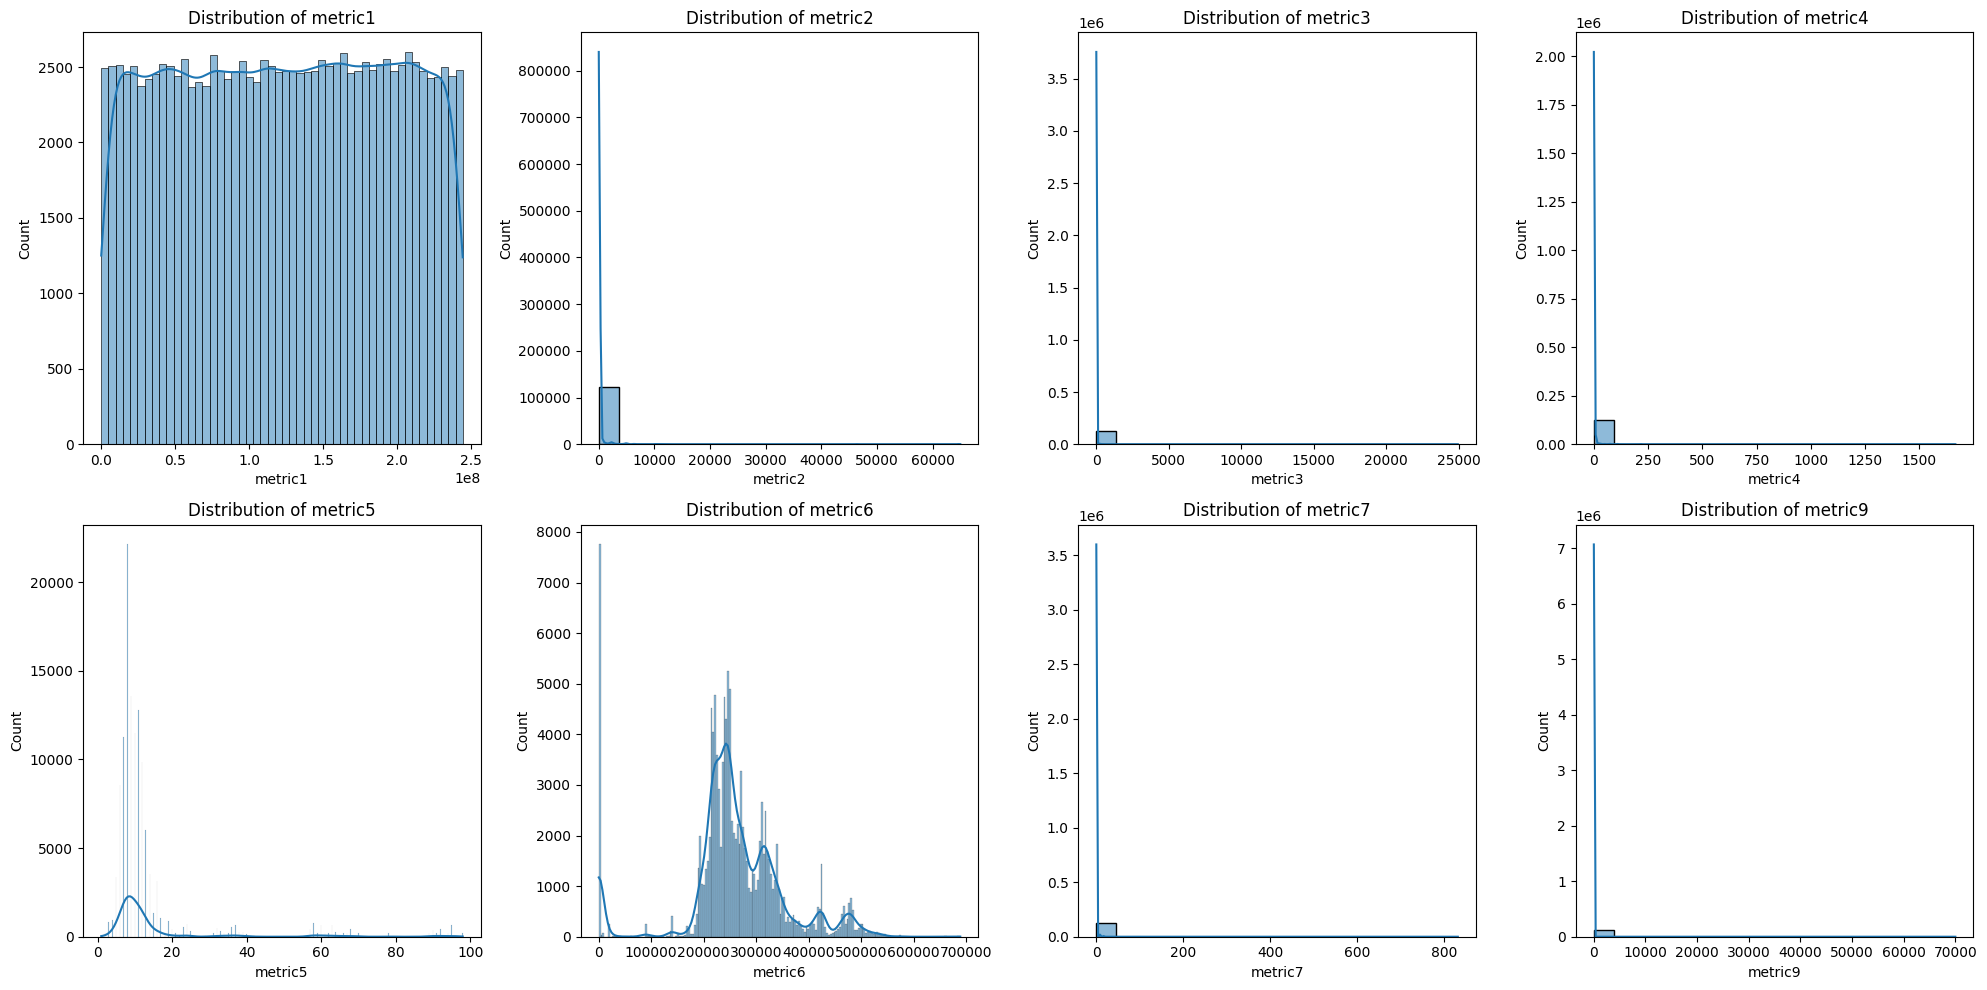

In [13]:
# Create histograms to visualize the distribution of selected metrics with 'failure' as hue
plt.figure(figsize=(4*5, 2*5))
print("Distribution for failure is 0")
mask= df.failure==0
for i, col in enumerate(['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7',  'metric9']):
    plt.subplot(2, 4, i + 1)
    sns.histplot(data=df.loc[mask], x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()

Distribution for failure is 1


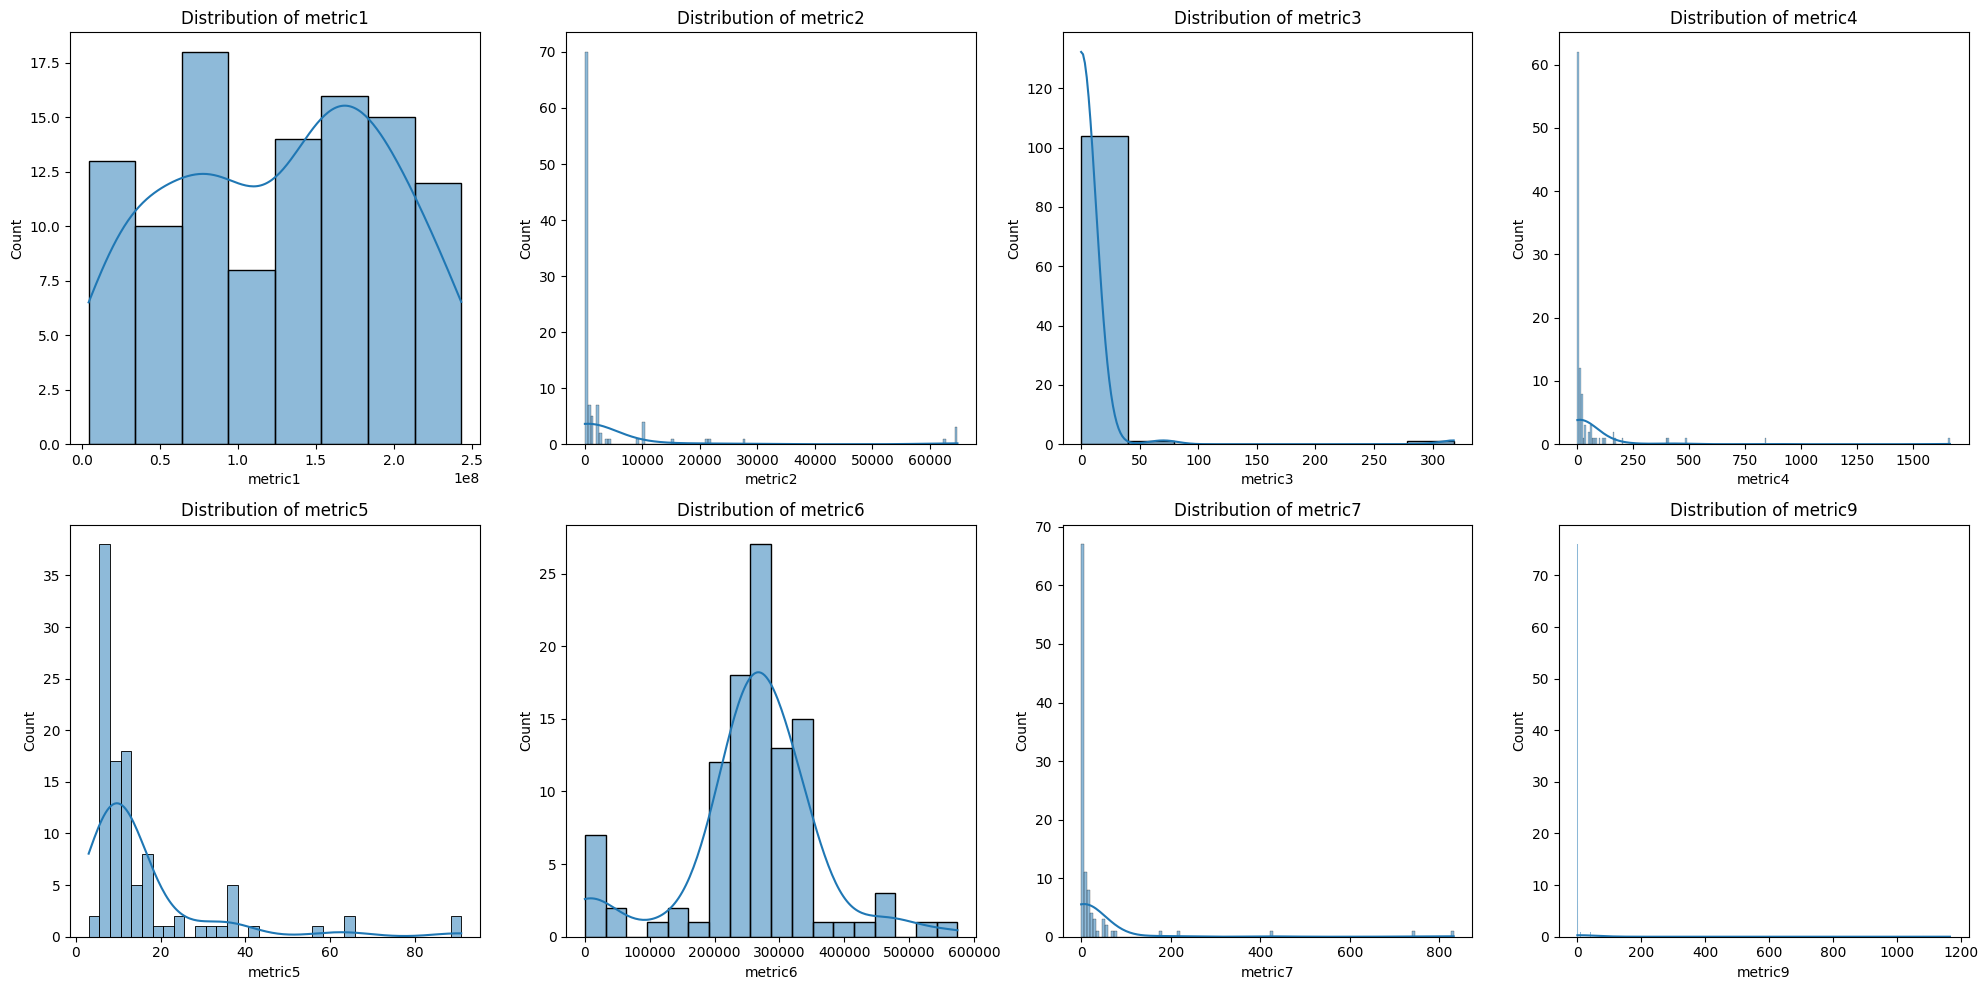

In [14]:
# Create histograms to visualize the distribution of selected metrics with 'failure' as hue
plt.figure(figsize=(20, 10))
print("Distribution for failure is 1")
mask= df.failure>0
for i, col in enumerate(['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric9']):
    plt.subplot(2, 4, i + 1)
    sns.histplot(data=df.loc[mask], x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()

Text(0.5, 1.0, 'Failure over Time by Month')

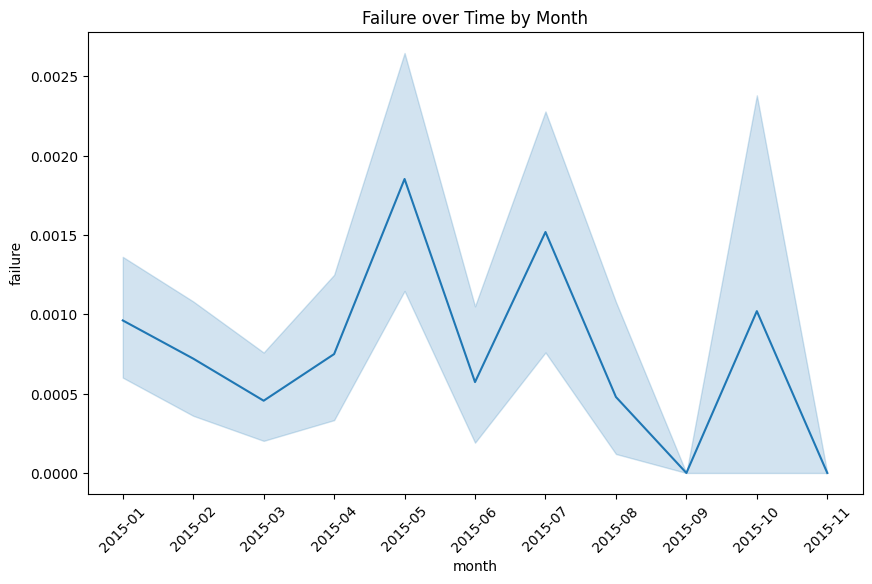

In [15]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract and format the 'month' column for plotting
df['month'] = df['date'].dt.to_period('M')
df['month'] = df['month'].dt.strftime('%Y-%m')

# Create a line plot to visualize 'failure' over time by month
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='month', y='failure')
plt.xticks(rotation=45)
plt.title("Failure over Time by Month")

Text(0.5, 1.0, 'Correlation Matrix')

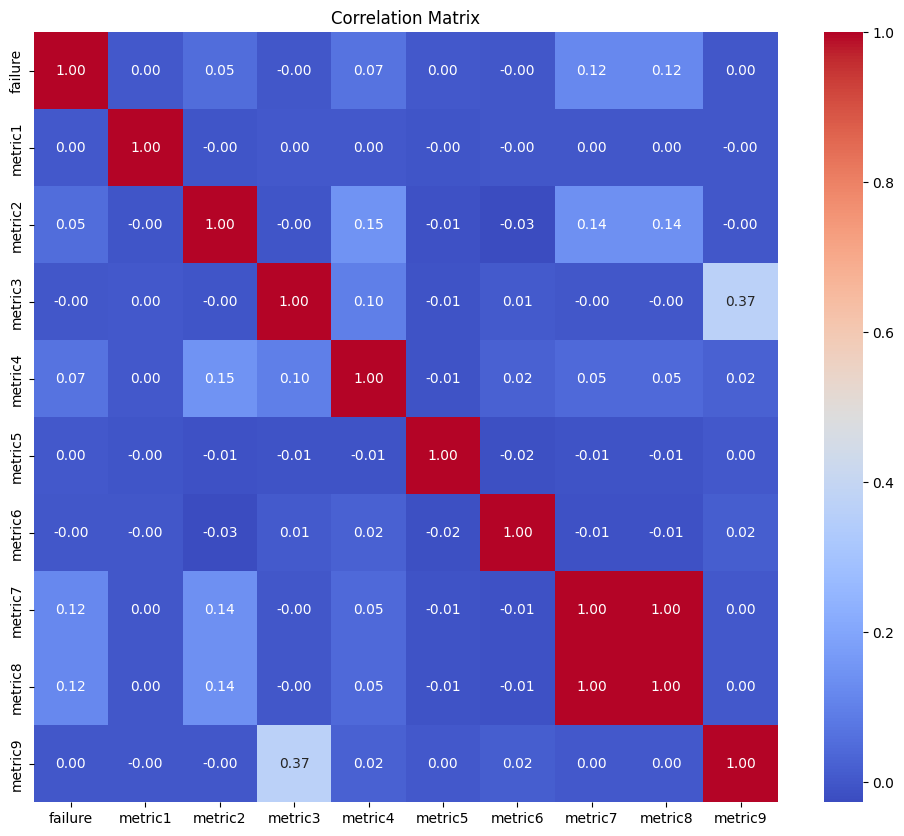

In [16]:
# Select only numeric columns for the correlation matrix
numeric_cols = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")

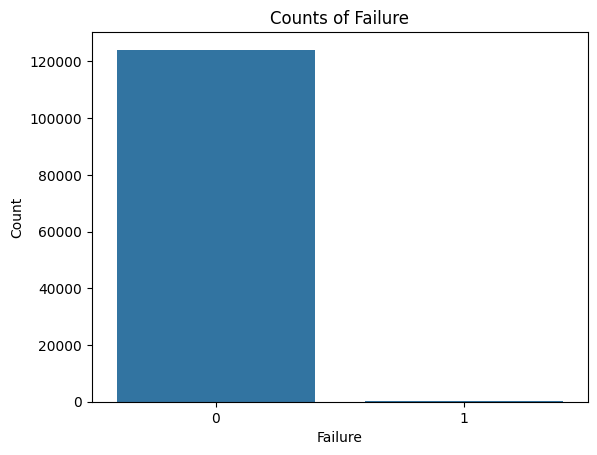

In [17]:
# Example: Bar plot of categorical feature (failure)
sns.countplot(x='failure', data=df)
plt.title('Counts of Failure')
plt.xlabel('Failure')
plt.ylabel('Count')
plt.show()


In [18]:
# Extract day of week, day of month, and is_weekend features from the 'date' column
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.dayofweek
df['day_of_month'] = df['date'].dt.day
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

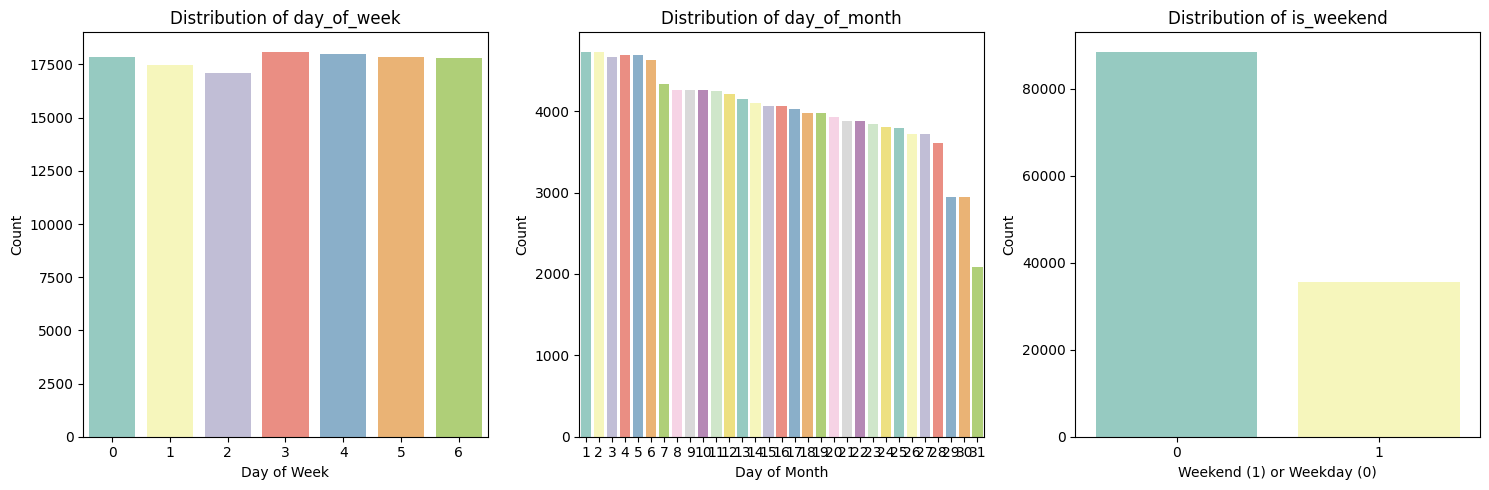

In [19]:
# Create subplots to visualize the distribution of day_of_week, day_of_month, and is_weekend
plt.figure(figsize=(15, 5))

# Distribution of 'day_of_week'
plt.subplot(131)
sns.countplot(data=df, x='day_of_week', palette='Set3', hue='day_of_week', legend=False)
plt.title("Distribution of day_of_week")
plt.xlabel("Day of Week")
plt.ylabel("Count")

# Distribution of 'day_of_month'
plt.subplot(132)
sns.countplot(data=df, x='day_of_month', palette='Set3',hue='day_of_month', legend=False)
plt.title("Distribution of day_of_month")
plt.xlabel("Day of Month")
plt.ylabel("Count")

# Distribution of 'is_weekend'
plt.subplot(133)
sns.countplot(data=df, x='is_weekend', palette='Set3', hue='is_weekend', legend=False)
plt.title("Distribution of is_weekend")
plt.xlabel("Weekend (1) or Weekday (0)")
plt.ylabel("Count")

# Show the subplots
plt.tight_layout()
plt.show()

In [20]:
# Extract the month number and week number from the 'date' column and drop the 'date' column
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week
df = df.drop(['date'], axis=1)

# Check the DataFrame information after these transformations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124243 entries, 0 to 124242
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   failure       124243 non-null  int64 
 1   metric1       124243 non-null  int64 
 2   metric2       124243 non-null  int64 
 3   metric3       124243 non-null  int64 
 4   metric4       124243 non-null  int64 
 5   metric5       124243 non-null  int64 
 6   metric6       124243 non-null  int64 
 7   metric7       124243 non-null  int64 
 8   metric8       124243 non-null  int64 
 9   metric9       124243 non-null  int64 
 10  device_model  124243 non-null  object
 11  month         124243 non-null  int32 
 12  day_of_week   124243 non-null  int32 
 13  day_of_month  124243 non-null  int32 
 14  is_weekend    124243 non-null  int64 
 15  week          124243 non-null  UInt32
dtypes: UInt32(1), int32(3), int64(11), object(1)
memory usage: 13.4+ MB


In [21]:
df=pd.get_dummies(df,drop_first=True)

In [22]:
df.to_csv('/Users/shambo/Documents/ML projects/End-to-End ML Pipeline for Predictive Maintenance/data/processed/predictive_maintenance_EDA_processed.csv', index=False)
new_df = pd.read_csv('/Users/shambo/Documents/ML projects/End-to-End ML Pipeline for Predictive Maintenance/data/processed/predictive_maintenance_EDA_processed.csv')
new_df

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,month,day_of_week,day_of_month,is_weekend,week,device_model_S1F1,device_model_W1F0,device_model_W1F1,device_model_Z1F0,device_model_Z1F1
0,0,215630672,55,0,52,6,407438,0,0,7,1,3,1,0,1,False,False,False,False,False
1,0,61370680,0,3,0,6,403174,0,0,0,1,3,1,0,1,False,False,False,False,False
2,0,173295968,0,0,0,12,237394,0,0,0,1,3,1,0,1,False,False,False,False,False
3,0,79694024,0,0,0,6,410186,0,0,0,1,3,1,0,1,False,False,False,False,False
4,0,135970480,0,0,0,15,313173,0,0,3,1,3,1,0,1,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124238,0,18310224,0,0,0,10,353705,8,8,0,11,0,2,0,45,False,False,False,True,False
124239,0,172556680,96,107,4,11,332792,0,0,13,11,0,2,0,45,False,False,False,True,False
124240,0,19029120,4832,0,0,11,350410,0,0,0,11,0,2,0,45,False,False,False,True,False
124241,0,226953408,0,0,0,12,358980,0,0,0,11,0,2,0,45,False,False,False,True,False


In [27]:
from imblearn.under_sampling import RandomUnderSampler
# Create a copy of the DataFrame 'df'
X = df.copy()

# Create the target variable 'Y' by selecting the 'failure' column
Y = df["failure"]

# Remove the 'failure' column from the feature matrix 'X'
X.drop("failure", axis=1, inplace=True)
# Create an instance of the RandomUnderSampler with a fixed random state
rus = RandomUnderSampler(random_state=42)

# Perform random under-sampling and obtain resampled feature matrix and target variable
X_resampled, y_resampled = rus.fit_resample(X, Y)
# Create a new DataFrame 'under_sample' by copying the resampled features and adding the 'failure' column back
under_sample = X_resampled.copy()
under_sample["failure"] = y_resampled
under_sample.sample(10)

,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,month,day_of_week,day_of_month,is_weekend,week,device_model_S1F1,device_model_W1F0,device_model_W1F1,device_model_Z1F0,device_model_Z1F1,failure
12636,220461296,0,0,0,14,325125,0,0,0,1,2,14,0,3,False,False,True,False,False,1
79350,141805096,0,0,1,7,267203,0,0,0,5,5,9,1,19,False,True,False,False,False,1
83799,91542544,0,2,0,12,265506,16,16,41,5,3,21,0,21,False,True,False,False,False,1
114000,65654088,0,0,0,9,298592,0,0,11,8,1,18,0,34,False,False,False,True,False,1
60211,7660592,0,0,0,8,264617,8,8,0,3,1,24,0,13,False,True,False,False,False,1
31021,153874016,736,0,11,36,272772,0,0,0,2,0,9,0,7,False,True,False,False,False,1
4790,47426056,0,0,0,12,246330,0,0,0,1,0,5,0,2,False,False,False,False,False,0
27483,40958456,1320,0,2,37,277142,0,0,5,2,2,4,0,6,False,True,False,False,False,1
88701,182047704,0,0,0,10,328405,0,0,0,6,3,4,0,23,False,True,False,False,False,0
24361,136982608,0,0,0,12,197046,0,0,0,1,5,31,1,5,False,False,False,False,False,0


Text(0.5, 1.0, "Distribution of 'failure'")

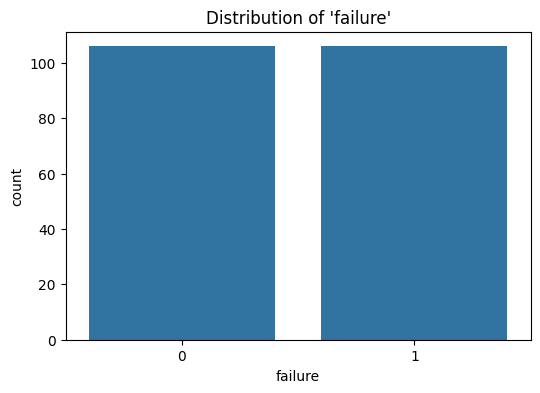

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(data=under_sample, x='failure')
plt.title("Distribution of 'failure'")

In [30]:
# Import the necessary libraries for model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create feature matrix 'X_norm' and target variable 'y_norm'
X_norm = under_sample.drop(['failure'], axis=1)
y_norm = under_sample['failure']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [32]:
# Import various classification algorithms and evaluation metrics
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to evaluate multiple classifiers and return a DataFrame with metrics
def evaluate_model(x_train, y_train, x_test, y_test):
    # Define a list of classifiers
    classifiers = [
        GradientBoostingClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        ExtraTreesClassifier(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        GaussianNB(),
        BernoulliNB(),
        SVC(),
        LogisticRegression(),
        SGDClassifier(),
    ]

    # Define the names of classifiers
    classifier_names = [
        'GradientBoost',
        'RandomForest',
        'AdaBoost',
        'ExtraTrees',
        'DecisionTree',
        'KNeighbors',
        'GaussianNB',
        'BernoulliNB',
        'SVC',
        'LogisticRegression',
        'SGD',
    ]

    # Create an empty DataFrame for metrics
    metrics = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=classifier_names)

    # Evaluate each classifier and store the metrics
    for i, clf in enumerate(classifiers):
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        metrics.loc[classifier_names[i], 'Accuracy'] = accuracy
        metrics.loc[classifier_names[i], 'Precision'] = precision
        metrics.loc[classifier_names[i], 'Recall'] = recall
        metrics.loc[classifier_names[i], 'F1'] = f1

    # Sort the metrics by accuracy in descending order
    metrics = metrics.sort_values(by='Accuracy', ascending=False)

    return metrics

# Step 4: Evaluate models
metrics = evaluate_model(x_train, y_train, x_test, y_test)

/Users/shambo/Documents/ML projects/End-to-End ML Pipeline for Predictive Maintenance/virtual-env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [33]:
metrics

,Accuracy,Precision,Recall,F1
RandomForest,0.930233,1.0,0.875,0.933333
GradientBoost,0.883721,0.952381,0.833333,0.888889
AdaBoost,0.860465,0.909091,0.833333,0.869565
ExtraTrees,0.813953,0.833333,0.833333,0.833333
DecisionTree,0.813953,0.863636,0.791667,0.826087
GaussianNB,0.790698,1.0,0.625,0.769231
BernoulliNB,0.697674,0.866667,0.541667,0.666667
LogisticRegression,0.674419,0.777778,0.583333,0.666667
KNeighbors,0.651163,0.714286,0.625,0.666667
SGD,0.651163,0.714286,0.625,0.666667


### Feature engineering insights (optional)
Example: Visualize relationship between features and target variable
> As we are using an example generated dataset, so its much not important
### Summary and insights
> Should be provided when working on read datasets